##  Simple SVD in Python  



In [24]:
import numpy as np
import pandas as pd
import math
import scipy as sp
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from sklearn.linear_model import LinearRegression

## random number generator
from numpy.random import default_rng
rng = np.random.default_rng(seed=42)

In [25]:
## X is n x p, iid N(0,1)
n = 20; p=3
#X = np.random.normal(size=(n,p))
X = rng.normal(size=(n,p))

In [26]:
print(X[:5,:])

[[ 0.30471708 -1.03998411  0.7504512 ]
 [ 0.94056472 -1.95103519 -1.30217951]
 [ 0.1278404  -0.31624259 -0.01680116]
 [-0.85304393  0.87939797  0.77779194]
 [ 0.0660307   1.12724121  0.46750934]]


In [27]:
## get svd and check basic dimensions
tsvd = np.linalg.svd(X)
print("the length of tsvd is:",len(tsvd))  ## the three members are U diag(Sigma) V(transpose)
print("dim of first: ",tsvd[0].shape)
print("dim of second: ",tsvd[1].shape)
print("dim of third: ",tsvd[2].shape)

the length of tsvd is: 3
dim of first:  (20, 20)
dim of second:  (3,)
dim of third:  (3, 3)


In [28]:
## get U and check that U'U = I
U = tsvd[0]
U.T @ U
print("U'U, should be identity:",(U.T @ U)[:5,:5])
print("diagonals: ",np.diag(U.T @ U))

U'U, should be identity: [[ 1.00000000e+00  1.19694154e-16  1.32067385e-16  1.34136135e-17
  -1.82794080e-17]
 [ 1.19694154e-16  1.00000000e+00 -1.45535709e-16  3.23615668e-17
  -2.25474455e-17]
 [ 1.32067385e-16 -1.45535709e-16  1.00000000e+00 -4.52319282e-17
   2.41541892e-17]
 [ 1.34136135e-17  3.23615668e-17 -4.52319282e-17  1.00000000e+00
   2.37948611e-17]
 [-1.82794080e-17 -2.25474455e-17  2.41541892e-17  2.37948611e-17
   1.00000000e+00]]
diagonals:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [29]:
## get Sigma, this is the r diagonals
Sigma = tsvd[1]
print("Sigma:",Sigma)
St = np.diag(Sigma) # rxr Sigma upper left corner.
# r is rank of X, which is the number of positive elements of Sigma
r = np.sum(Sigma>.00000001)
print("rank of X: ",r)

Sigma: [4.66964398 3.1048383  2.28635609]
rank of X:  3


In [30]:
## get V, this is actually V' 
V = tsvd[2]
print("VV', should be identity:\n",V @ V.T)

VV', should be identity:
 [[ 1.00000000e+00 -1.13061312e-16 -2.59660312e-18]
 [-1.13061312e-16  1.00000000e+00  7.05924670e-17]
 [-2.59660312e-18  7.05924670e-17  1.00000000e+00]]


In [31]:
## reconstruct X from the reduced form version of the SVD
Ut = U[:,0:r] # first r columns of X

## this should be X
check = Ut @ St @ V

## check that check = X
cdif = check-X
print("should be all 0 !!!!!")
print(np.abs(cdif).sum())

should be all 0 !!!!!
3.7941871866564725e-14


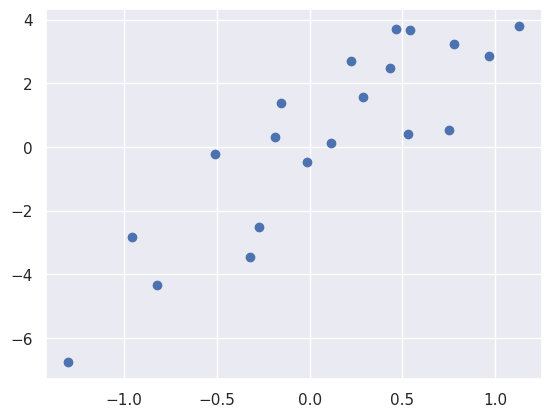

In [32]:
## check linear regression
## simulate y
beta = np.array([1,2,3]).reshape((p,1))
sigma = .1
y = X @ beta + sigma * np.random.normal(size=(n,1))
plt.scatter(X[:,2],y)

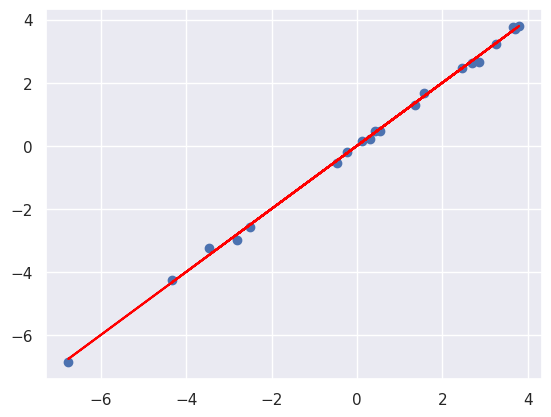

In [33]:
## fit reg in sklearn
lmod = LinearRegression(fit_intercept=False)
lmod.fit(X,y)
yhat = lmod.predict(X)
plt.scatter(y,yhat)
plt.plot(y,y,c='red')

In [34]:
## Xp is the moore-penrose inverse
#Xp = V.T @ np.linalg.inv(St) @ Ut.T
Xp = V.T @ np.diag(1/Sigma) @ Ut.T
print('Xp * y:\n',Xp @ y)
print('check:\n', lmod.coef_)

Xp * y:
 [[0.99824018]
 [2.00092279]
 [2.98850101]]
check:
 [[0.99824018 2.00092279 2.98850101]]


In [35]:
## yhat from Ut, col's of Ut are ON basis for column space of X
yhat1 = Ut @ Ut.T @ y
check = yhat - yhat1
print("check should be 0: ",np.sum(np.abs(yhat-yhat1)))

check should be 0:  2.942091015256665e-14


In [36]:
## yhat should also be XXp+ y.
yhat2 = X @ Xp @ y
print("check should be 0: ",np.sum(np.abs(yhat-yhat2)))

check should be 0:  1.9068080447937064e-14


In [37]:
##################################################
## let's see what happens in the non full-rank case
## well append X with the sum of the columns of X
Xbar = X.sum(axis=1)
print('\n shape of Xbar is: \n',Xbar.shape,'\n')
## check Xp * Xbar should be all ones
print(Xp @ Xbar)


 shape of Xbar is: 
 (20,) 

[1. 1. 1.]


In [38]:
## try one of these two, X1 will not have full rank
X1 = np.hstack([X,Xbar.reshape((n,1))]) # add on mean of columns
#X1 = np.hstack([X,X[:,p-1].reshape(n,1)]) # repeat last column

In [39]:
## get svd and check basic dimensions
tsvd = np.linalg.svd(X1)
print("the length of tsvd is:",len(tsvd))
print("dim of first: ",tsvd[0].shape)
print("dim of second: ",tsvd[1].shape)
print("dim of third: ",tsvd[2].shape)

the length of tsvd is: 3
dim of first:  (20, 20)
dim of second:  (4,)
dim of third:  (4, 4)


In [40]:
## check out the singular values
print(tsvd[1])

[6.54605615e+00 4.41633908e+00 2.29326629e+00 3.68018369e-16]


In [41]:
## set rank
#r=3
r = sum(tsvd[1]>.000001)
print('r is: \n',r,'\n')

## reconstruct X from the reduced form version of the SVD
Ut1 = tsvd[0][:,0:r] # first r columns of X

r is: 
 3 



In [42]:
yhat3 = Ut1 @ Ut1.T @ y
print("check should be 0: ",np.sum(np.abs(yhat-yhat3)))

check should be 0:  4.1494585545365226e-14


In [43]:
Vt1 = (tsvd[2].T)[:,0:r] # reduced form
Xp1 = Vt1 @ np.diag(1/tsvd[1][0:r]) @ Ut1.T #MP generalized inverse
bo1 = Xp1 @ y #MP choice of coefficents

In [44]:
yhat4 = X1  @ bo1
print("check should be 0: ",np.sum(np.abs(yhat-yhat4)))

check should be 0:  3.0253577421035516e-14


In [45]:
## bo1
print(bo1)

[[-0.49867582]
 [ 0.50400679]
 [ 1.49158502]
 [ 1.496916  ]]


In [46]:
check1 = Ut1 @ np.diag(tsvd[1][0:r]) @ Vt1.T

## check that check1 = X
cdif = check1-X1
print("should be all 0 !!!!!")
print(np.abs(cdif).sum())

should be all 0 !!!!!
3.318005592500839e-14
